In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data/2019/Divvy_Trips_2019_full.csv.gz", compression="gzip")

C:\Users\fpokr\AppData\Local\Temp\ipykernel_16768\672813569.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data/2019/Divvy_Trips_2019_full.csv.gz", compression="gzip")


In [7]:
people = df[["gender", "birthyear"]]
people = people.dropna()

people

,gender,birthyear
0,Male,1989.0
1,Female,1990.0
2,Female,1994.0
3,Male,1993.0
4,Male,1994.0
...,...,...
4194076,Female,1994.0
4194077,Male,1993.0
4194078,Male,1991.0
4194081,Female,1984.0


In [8]:
grouped_gender = pd.DataFrame(people["gender"].value_counts())
# grouped_gender = grouped_gender.reset_index()


grouped_gender

,count
gender,
Male,2523744
Female,813553


Text(0.5, 1.0, 'Распределение по полу в 2019 году')

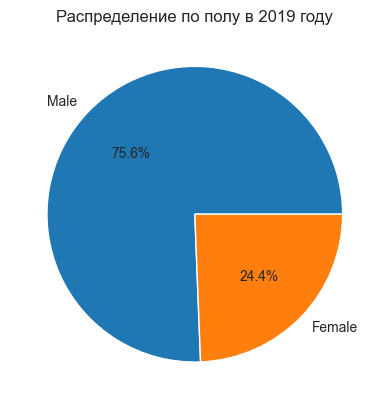

In [9]:
plt.pie(grouped_gender["count"], autopct="%1.1f%%", labels=grouped_gender.index)
plt.title("Распределение по полу в 2019 году")

In [10]:
grouped_age = pd.DataFrame(people["birthyear"].value_counts())
grouped_age = grouped_age.reset_index()
# grouped_age.rename(columns={"index": "birthyear", "birthyear": "count"}, inplace=True)

grouped_age

,birthyear,count
0,1989.0,203242
1,1990.0,182454
2,1991.0,179418
3,1992.0,175098
4,1987.0,171085
...,...,...
82,1933.0,8
83,2017.0,7
84,1915.0,4
85,1936.0,1


In [21]:
grouped_age = grouped_age[grouped_age["birthyear"] > 1945.0]
grouped_age = grouped_age[grouped_age["birthyear"] < 2010.0]
grouped_age

,birthyear,count
0,1989.0,203242
1,1990.0,182454
2,1991.0,179418
3,1992.0,175098
4,1987.0,171085
5,1988.0,170961
6,1986.0,156820
7,1993.0,142279
8,1985.0,141346
9,1984.0,141063


In [22]:
age_retiree = grouped_age[
    (grouped_age["birthyear"] > 1930.0) & (grouped_age["birthyear"] < 1965.0)
]
age_adults = grouped_age[
    (grouped_age["birthyear"] >= 1965.0) & (grouped_age["birthyear"] < 1995.0)
]
age_student = grouped_age[
    (grouped_age["birthyear"] >= 1995.0) & (grouped_age["birthyear"] < 2010.0)
]

In [23]:
import seaborn as sns
import numpy as np

C:\Users\fpokr\AppData\Local\Temp\ipykernel_16768\2748025692.py:22: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(


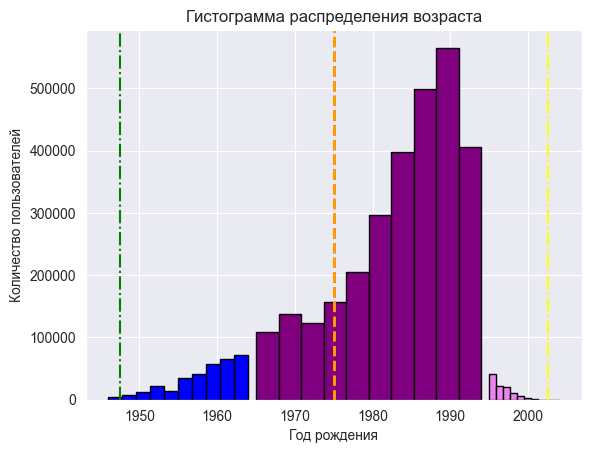

In [24]:
# matplotlib histogram
plt.hist(
    age_retiree["birthyear"],
    weights=age_retiree["count"],
    color="blue",
    edgecolor="black",
)
plt.hist(
    age_adults["birthyear"],
    weights=age_adults["count"],
    color="purple",
    edgecolor="black",
)
plt.hist(
    age_student["birthyear"],
    weights=age_student["count"],
    color="violet",
    edgecolor="black",
)

# seaborn histogram
sns.distplot(
    grouped_age["birthyear"], hist=True, kde=False, bins=int(180 / 5), color="blue"
)
# Add labels
plt.title("Гистограмма распределения возраста")
plt.xlabel("Год рождения")
plt.ylabel("Количество пользователей")
mean = np.mean(grouped_age["birthyear"])
plt.axvline(mean, color="r", linestyle="dashed", linewidth=2)
median = np.median(grouped_age["birthyear"])
plt.axvline(median, color="orange", linestyle="dashed", linewidth=2)
q1 = np.quantile(grouped_age["birthyear"], 0.025)
q3 = np.quantile(grouped_age["birthyear"], 0.975)
plt.axvline(q1, color="green", linestyle="-.")
plt.axvline(q3, color="yellow", linestyle="-.")

In [25]:
mean

1975.0

In [26]:
median

1975.0

Text(0, 0.5, 'Количество пользователей')

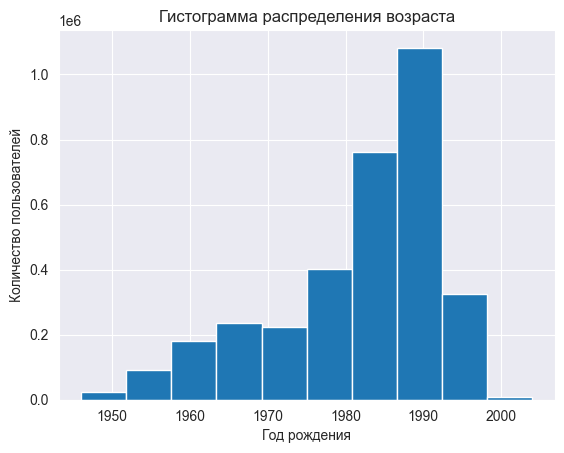

In [29]:
plt.hist(
    grouped_age["birthyear"],
    weights=grouped_age["count"],
)
plt.title("Гистограмма распределения возраста")
plt.xlabel("Год рождения")
plt.ylabel("Количество пользователей")